In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv("C:\\Users\\NAMAN\\Downloads\\Titanic-Dataset.csv")

In [4]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
print(df.shape)
df.info()

(891, 12)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [7]:
df['Age'].fillna(df['Age'].median(),inplace=True)
df.drop(['Cabin'],axis=1,inplace=True)
df['Embarked'].fillna(df['Embarked'].mode()[0],inplace=True)

In [8]:
print(df.duplicated().sum())

0


In [9]:
num_features = [features for features in df.columns if df[features].dtype != 'O']
print('we have : {} numeric feature and those are : {}'.format(len(num_features),num_features))
cat_feartures = [features for features in df.columns if df[features].dtype == 'O']
print('we have : {} categorical feature and those are : {}'.format(len(cat_feartures),cat_feartures))

we have : 7 numeric feature and those are : ['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']
we have : 4 categorical feature and those are : ['Name', 'Sex', 'Ticket', 'Embarked']


In [10]:
df_num = df[['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']]
df_cat = df[['Name', 'Sex', 'Ticket', 'Embarked']]

<Figure size 600x500 with 0 Axes>

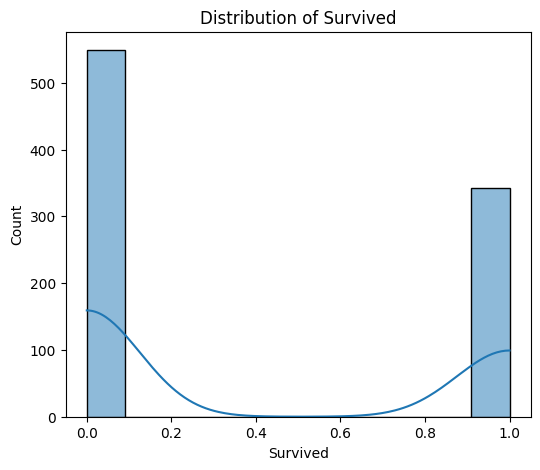

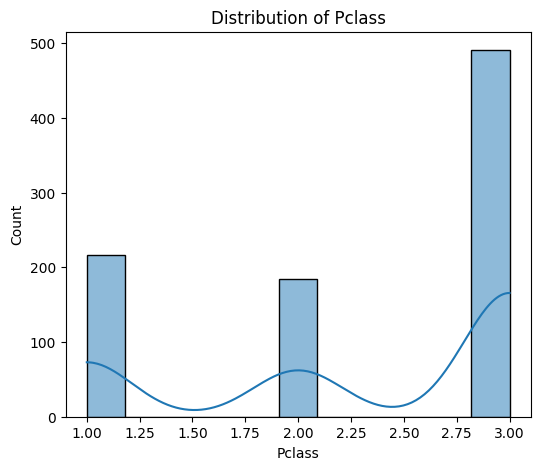

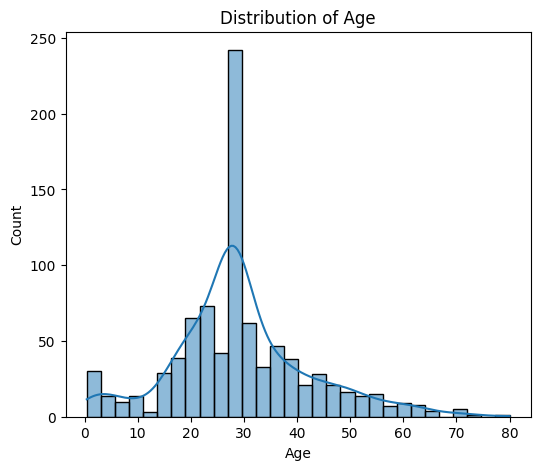

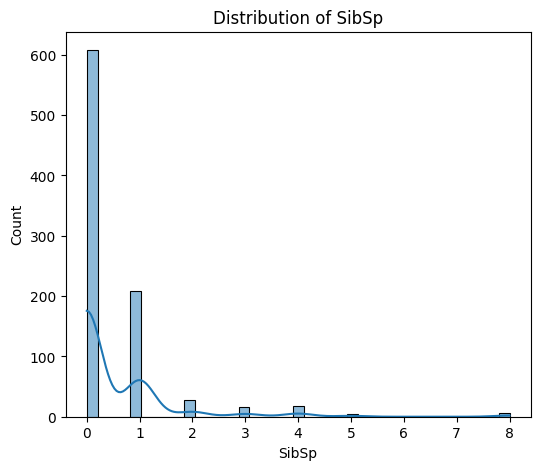

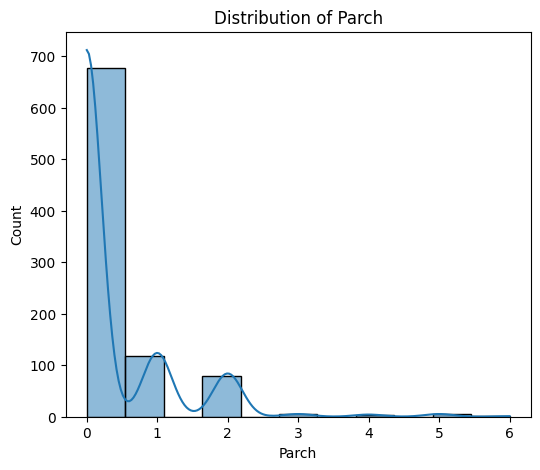

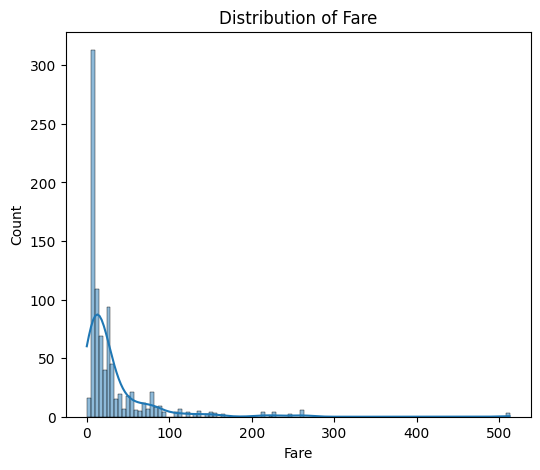

In [11]:
for i in df_num.columns:
    plt.figure(figsize=(6,5))
    if i == 'PassengerId' :continue
    else : sns.histplot(df_num[i],kde=True) 
    plt.title(f'Distribution of {i}')
    plt.show()

<Figure size 1000x500 with 0 Axes>

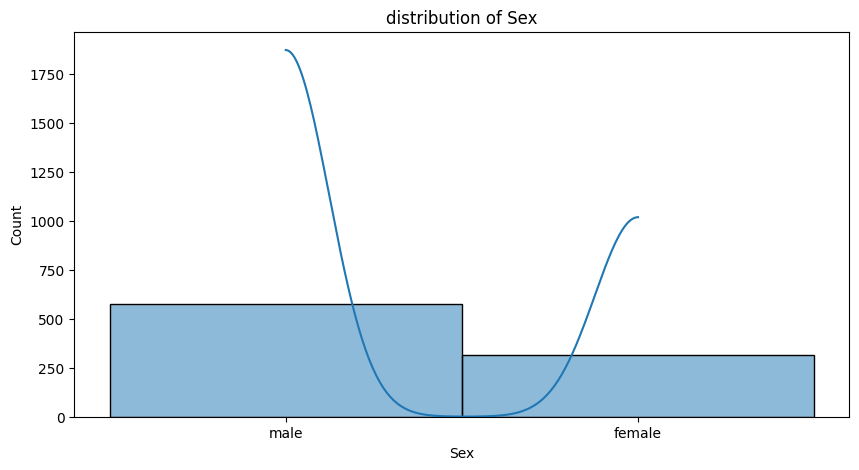

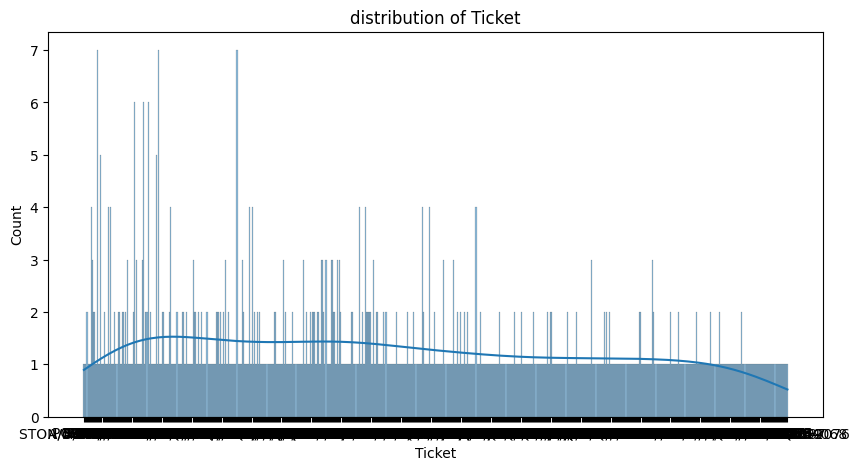

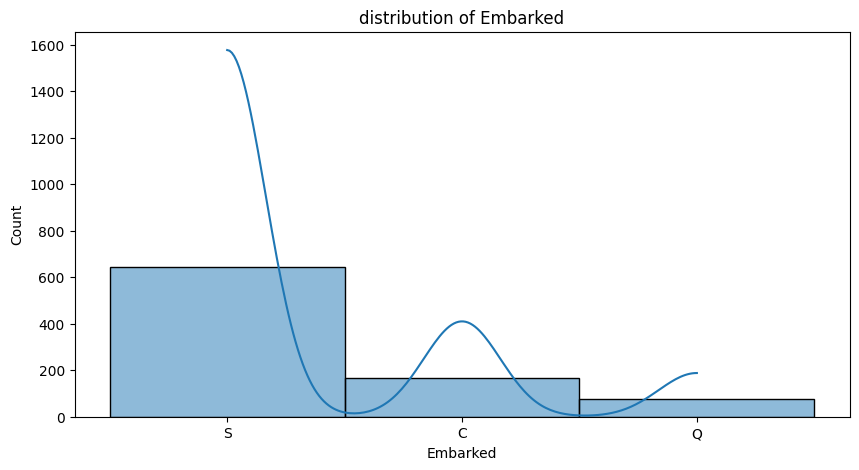

In [12]:
for i in df_cat.columns:
    plt.figure(figsize=(10,5))
    if i == 'Name' :continue
    else : sns.histplot(df_cat[i],kde=True)
    plt.title(f'distribution of {i}')
    plt.show()

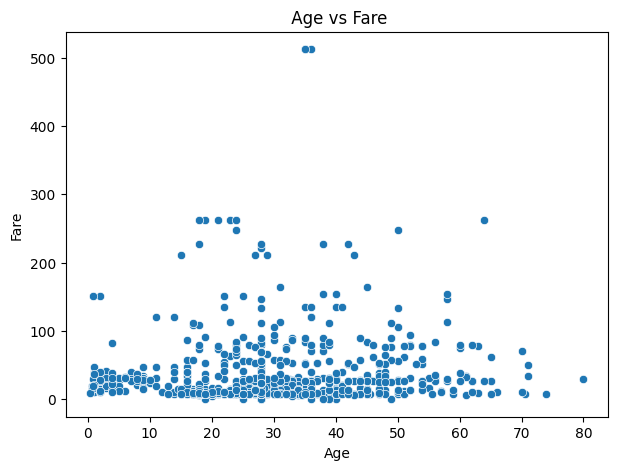

In [13]:
plt.figure(figsize=(7, 5))
sns.scatterplot(x='Age', y='Fare', data=df)
plt.title(' Age vs Fare')
plt.show()

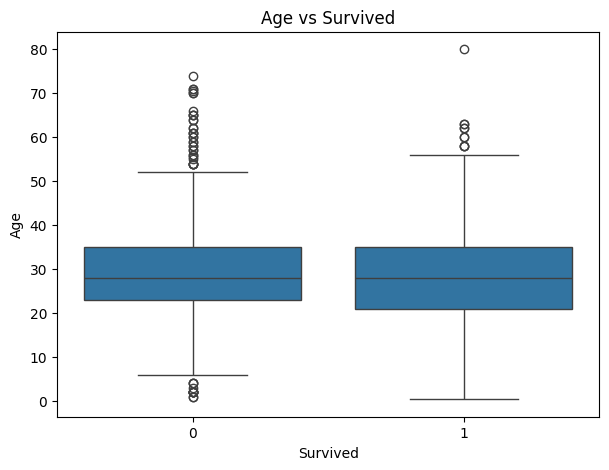

In [14]:
plt.figure(figsize=(7,5))
sns.boxplot(df,x='Survived',y='Age')
plt.title('Age vs Survived')
plt.show()

In [15]:
pd.pivot_table(df,index='Survived',values=['PassengerId', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare'])

,Age,Fare,Parch,PassengerId,Pclass,SibSp
Survived,,,,,,
0,30.028233,22.117887,0.329690,447.016393,2.531876,0.553734
1,28.291433,48.395408,0.464912,444.368421,1.950292,0.473684


In [16]:
df['Sex'] = df['Sex'].replace({'female':1,'male':0}).astype(int)

In [17]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()

df['Embarked'] = encoder.fit_transform(df['Embarked'])

In [18]:
df.drop(columns=['Name','PassengerId','Ticket'],inplace=True)

[]

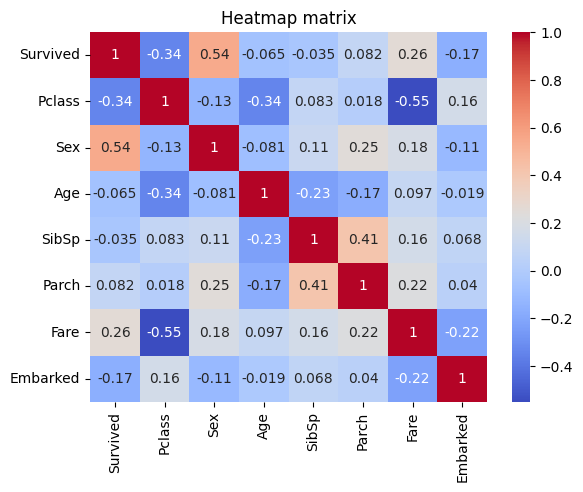

In [19]:
matrix = df.corr()
sns.heatmap(matrix,annot=True,cmap='coolwarm')
plt.title('Heatmap matrix')
plt.plot()

In [20]:
print(df.describe().round(1))

       Survived  Pclass    Sex    Age  SibSp  Parch   Fare  Embarked
count     891.0   891.0  891.0  891.0  891.0  891.0  891.0     891.0
mean        0.4     2.3    0.4   29.4    0.5    0.4   32.2       1.5
std         0.5     0.8    0.5   13.0    1.1    0.8   49.7       0.8
min         0.0     1.0    0.0    0.4    0.0    0.0    0.0       0.0
25%         0.0     2.0    0.0   22.0    0.0    0.0    7.9       1.0
50%         0.0     3.0    0.0   28.0    0.0    0.0   14.5       2.0
75%         1.0     3.0    1.0   35.0    1.0    0.0   31.0       2.0
max         1.0     3.0    1.0   80.0    8.0    6.0  512.3       2.0


In [21]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,22.0,1,0,7.2500,2
1,1,1,1,38.0,1,0,71.2833,0
2,1,3,1,26.0,0,0,7.9250,2
3,1,1,1,35.0,1,0,53.1000,2
4,0,3,0,35.0,0,0,8.0500,2


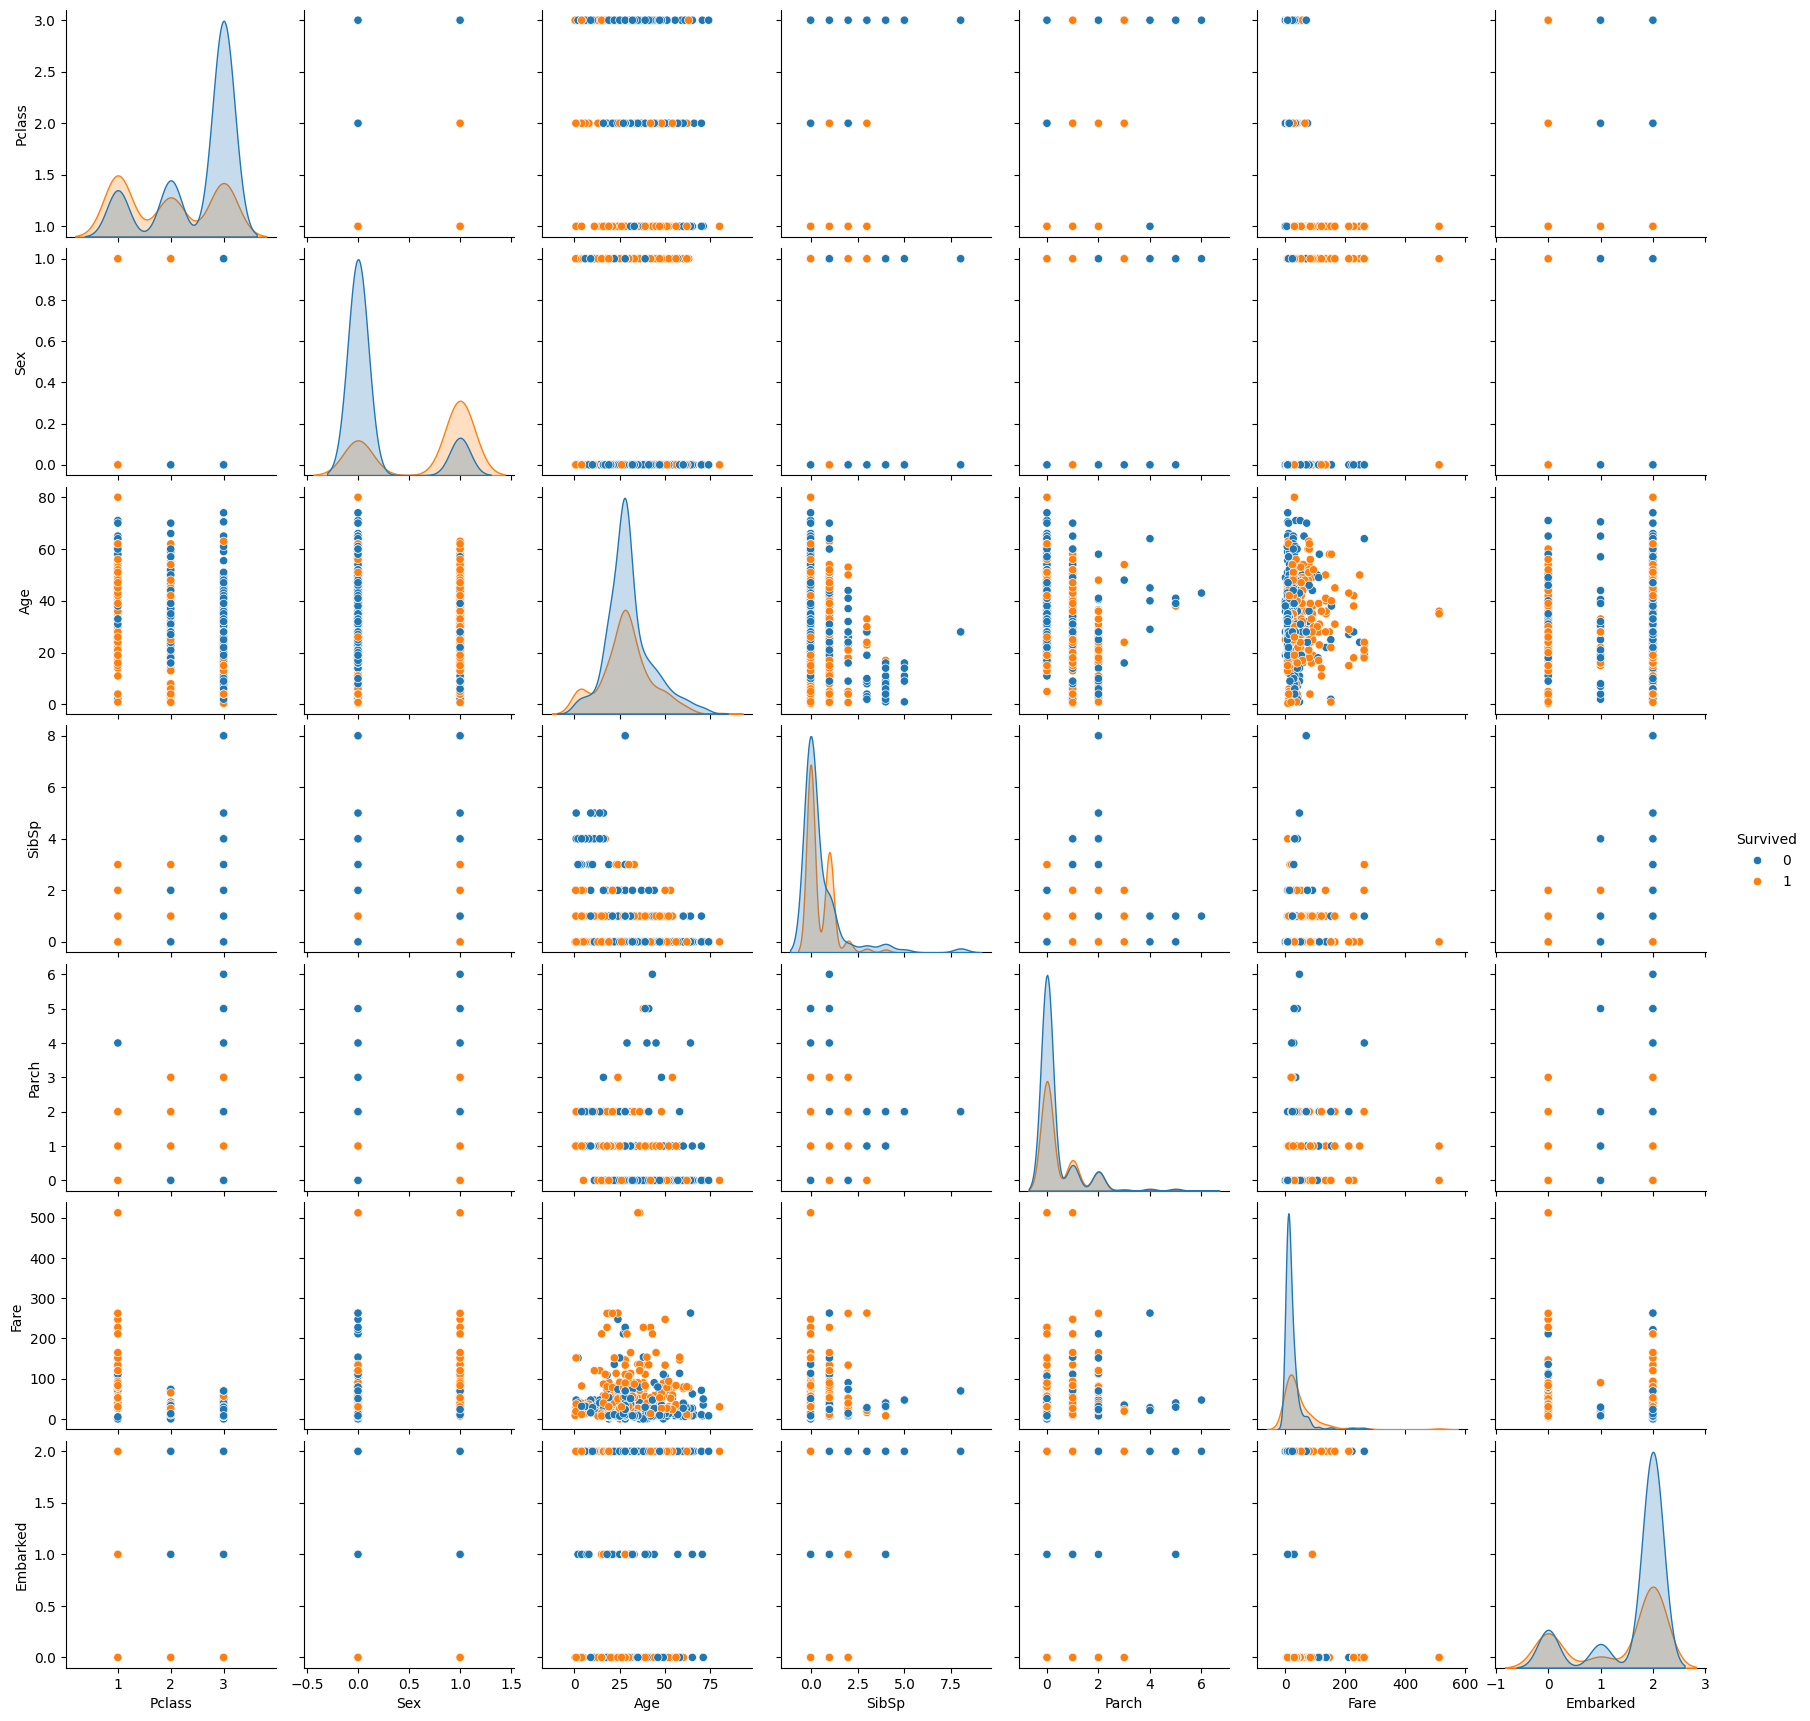

In [22]:
sns.pairplot(df, hue='Survived')
plt.show()

In [23]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

In [24]:
x = df.drop('Survived',axis=1)
y = df['Survived']

In [25]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [26]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [27]:
models = {
    'LogisticRegression' : LogisticRegression(),
    'Decision tree' : DecisionTreeClassifier(),
    'KNeighbors' : KNeighborsClassifier(),
    'Random Forest' : RandomForestClassifier(),
    'Support vector machine' : SVC()
}

In [32]:
for name, model in models.items():
    model.fit(X_train_scaled,y_train)
    y_pred = model.predict(X_test_scaled)
    print(f'performance of the model {name} :')
    print('Accuracy :',accuracy_score(y_test,y_pred))
    cross_val_score(model,X_train_scaled,y_train,cv=10)
    print('Mean of cross validation : ',cross_val_score(model,X_train_scaled,y_train,cv=10).mean())
    print('classification report : ','\n',classification_report(y_test,y_pred))
    print('-' * 53)

performance of the model LogisticRegression :
Accuracy : 0.8044692737430168
Mean of cross validation :  0.7962832550860719
classification report :  
               precision    recall  f1-score   support

           0       0.82      0.86      0.84       105
           1       0.78      0.73      0.76        74

    accuracy                           0.80       179
   macro avg       0.80      0.79      0.80       179
weighted avg       0.80      0.80      0.80       179

-----------------------------------------------------
performance of the model Decision tree :
Accuracy : 0.7877094972067039
Mean of cross validation :  0.7612480438184664
classification report :  
               precision    recall  f1-score   support

           0       0.83      0.80      0.82       105
           1       0.73      0.77      0.75        74

    accuracy                           0.79       179
   macro avg       0.78      0.79      0.78       179
weighted avg       0.79      0.79      0.79       17

In [29]:
cm = confusion_matrix(y_test, y_pred)

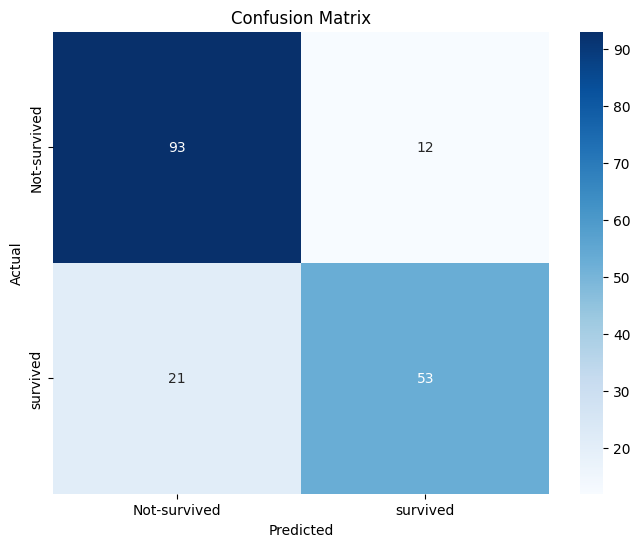

In [31]:
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Not-survived', 'survived'], yticklabels=['Not-survived', 'survived'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()